In [211]:
%matplotlib inline
from pathlib import Path
import numpy as np

In [212]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [213]:
import pandas as pd

In [214]:
housing_df=pd.read_csv('C:\\Users\\Azamat\\Documents\\data_mining_for_BA\\datasets\\WestRoxbury.csv')

In [215]:
housing_df.shape

(5802, 14)

In [216]:
housing_df.info

<bound method DataFrame.info of       TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0            344.2  4330       9965      1880         2436         1352   
1            412.6  5190       6590      1945         3108         1976   
2            330.1  4152       7500      1890         2294         1371   
3            498.6  6272      13773      1957         5032         2608   
4            331.5  4170       5000      1910         2370         1438   
...            ...   ...        ...       ...          ...          ...   
5797         404.8  5092       6762      1938         2594         1714   
5798         407.9  5131       9408      1950         2414         1333   
5799         406.5  5113       7198      1987         2480         1674   
5800         308.7  3883       6890      1946         2000         1000   
5801         447.6  5630       7406      1950         2510         1600   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIR

In [217]:
housing_df.head()

,TOTAL VALUE,TAX,LOT SQFT,YR BUILT,GROSS AREA,LIVING AREA,FLOORS,ROOMS,BEDROOMS,FULL BATH,HALF BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2,0,1,0,None


In [218]:
print(housing_df)

      TOTAL VALUE    TAX  LOT SQFT   YR BUILT  GROSS AREA   LIVING AREA  \
0            344.2  4330       9965      1880         2436         1352   
1            412.6  5190       6590      1945         3108         1976   
2            330.1  4152       7500      1890         2294         1371   
3            498.6  6272      13773      1957         5032         2608   
4            331.5  4170       5000      1910         2370         1438   
...            ...   ...        ...       ...          ...          ...   
5797         404.8  5092       6762      1938         2594         1714   
5798         407.9  5131       9408      1950         2414         1333   
5799         406.5  5113       7198      1987         2480         1674   
5800         308.7  3883       6890      1946         2000         1000   
5801         447.6  5630       7406      1950         2510         1600   

      FLOORS   ROOMS  BEDROOMS   FULL BATH  HALF BATH  KITCHEN  FIREPLACE  \
0         2.0      6  

In [219]:
housing_df.columns

Index(['TOTAL VALUE ', 'TAX', 'LOT SQFT ', 'YR BUILT', 'GROSS AREA ',
       'LIVING AREA', 'FLOORS ', 'ROOMS', 'BEDROOMS ', 'FULL BATH',
       'HALF BATH', 'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [220]:
housing_df=housing_df.rename(columns={'TOTAL VALUE ': 'TOTAL_VALUE'}) #explicit

In [221]:
housing_df.columns=[s.strip().replace(' ', '_') for s in housing_df.columns]

In [222]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [223]:
housing_df.loc[0:3]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None


In [224]:
housing_df.iloc[0:4]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
0,344.2,4330,9965,1880,2436,1352,2.0,6,3,1,1,1,0,None
1,412.6,5190,6590,1945,3108,1976,2.0,10,4,2,1,1,0,Recent
2,330.1,4152,7500,1890,2294,1371,2.0,8,4,1,1,1,0,None
3,498.6,6272,13773,1957,5032,2608,1.0,9,5,1,1,1,1,None


In [225]:
housing_df['TOTAL_VALUE'].iloc[0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [226]:
housing_df.iloc[4, 0:10]

TOTAL_VALUE    331.5
TAX             4170
LOT_SQFT        5000
YR_BUILT        1910
GROSS_AREA      2370
LIVING_AREA     1438
FLOORS             2
ROOMS              7
BEDROOMS           3
FULL_BATH          2
Name: 4, dtype: object

In [227]:
housing_df.iloc[4:5, 0:10]

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH
4,331.5,4170,5000,1910,2370,1438,2.0,7,3,2


In [228]:
pd.concat([housing_df.iloc[4:6,0:2], housing_df.iloc[4:6, 4:6]], axis=1)

,TOTAL_VALUE,TAX,GROSS_AREA,LIVING_AREA
4,331.5,4170,2370,1438
5,337.4,4244,2124,1060


In [229]:
housing_df.iloc[:, 0:1]

,TOTAL_VALUE
0,344.2
1,412.6
2,330.1
3,498.6
4,331.5
...,...
5797,404.8
5798,407.9
5799,406.5
5800,308.7


In [230]:
housing_df.TOTAL_VALUE

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

In [231]:
housing_df['TOTAL_VALUE']

0       344.2
1       412.6
2       330.1
3       498.6
4       331.5
        ...  
5797    404.8
5798    407.9
5799    406.5
5800    308.7
5801    447.6
Name: TOTAL_VALUE, Length: 5802, dtype: float64

In [232]:
housing_df['TOTAL_VALUE'][0:10]

0    344.2
1    412.6
2    330.1
3    498.6
4    331.5
5    337.4
6    359.4
7    320.4
8    333.5
9    409.4
Name: TOTAL_VALUE, dtype: float64

In [233]:
print('Number of rows ', len(housing_df['TOTAL_VALUE']))

Number of rows  5802


In [234]:
print('Mean of TOTAL_VALUE ', housing_df['TOTAL_VALUE'].mean())

Mean of TOTAL_VALUE  392.6857149258877


In [235]:
housing_df.describe()

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE
count,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.000000,5802.00000,5802.000000
mean,392.685715,4939.485867,6278.083764,1936.744916,2924.842123,1657.065322,1.683730,6.994829,3.230093,1.296794,0.613926,1.01534,0.739917
std,99.177414,1247.649118,2669.707974,35.989910,883.984726,540.456726,0.444884,1.437657,0.846607,0.522040,0.533839,0.12291,0.565108
min,105.000000,1320.000000,997.000000,0.000000,821.000000,504.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1.00000,0.000000
25%,325.125000,4089.500000,4772.000000,1920.000000,2347.000000,1308.000000,1.000000,6.000000,3.000000,1.000000,0.000000,1.00000,0.000000
50%,375.900000,4728.000000,5683.000000,1935.000000,2700.000000,1548.500000,2.000000,7.000000,3.000000,1.000000,1.000000,1.00000,1.000000
75%,438.775000,5519.500000,7022.250000,1955.000000,3239.000000,1873.750000,2.000000,8.000000,4.000000,2.000000,1.000000,1.00000,1.000000
max,1217.800000,15319.000000,46411.000000,2011.000000,8154.000000,5289.000000,3.000000,14.000000,9.000000,5.000000,3.000000,2.00000,4.000000


In [236]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [237]:
housing_df.sample(5)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
3664,273.2,3436,4626,1945,2247,1042,1.0,6,2,1,0,1,0,None
3816,350.0,4403,4602,1910,2512,1544,2.0,6,3,1,1,1,1,Old
5055,375.8,4727,6200,1925,2354,1504,2.0,7,3,1,1,1,0,None
1567,347.8,4375,6124,1957,2256,1100,1.0,8,1,1,0,1,1,None
816,336.3,4230,4259,1987,2662,1634,2.0,6,3,1,1,1,0,Old


In [238]:
weights = [0.9 if rooms > 10 else 0.01 for rooms in housing_df.ROOMS]

In [239]:
housing_df.sample(5, weights=weights)

,TOTAL_VALUE,TAX,LOT_SQFT,YR_BUILT,GROSS_AREA,LIVING_AREA,FLOORS,ROOMS,BEDROOMS,FULL_BATH,HALF_BATH,KITCHEN,FIREPLACE,REMODEL
4318,807.0,10152,15790,1848,5260,2890,2.0,11,5,3,1,1,2,Old
5516,509.1,6404,7500,1900,2894,1848,2.0,8,3,1,1,1,1,Recent
4707,494.4,6219,6954,1925,3911,2138,2.5,11,6,2,1,1,1,None
2367,472.4,5942,6100,1935,2856,1808,2.0,7,4,1,0,1,1,None
4680,571.3,7186,7981,1886,4580,2480,2.0,11,6,2,1,1,1,None


In [240]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL'],
      dtype='object')

In [241]:
print(housing_df.REMODEL.dtype)


object


In [242]:
housing_df['REMODEL'] = housing_df.REMODEL.astype('category')

In [243]:
print(housing_df.REMODEL.cat.categories)

Index(['None', 'Old', 'Recent'], dtype='object')


In [244]:
print(housing_df.REMODEL.dtype)

category


In [245]:
housing_df['BEDROOMS'].dtype

dtype('int64')

In [246]:
housing_df['TOTAL_VALUE'].dtype

dtype('float64')

In [247]:
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

In [248]:
housing_df.columns

Index(['TOTAL_VALUE', 'TAX', 'LOT_SQFT', 'YR_BUILT', 'GROSS_AREA',
       'LIVING_AREA', 'FLOORS', 'ROOMS', 'BEDROOMS', 'FULL_BATH', 'HALF_BATH',
       'KITCHEN', 'FIREPLACE', 'REMODEL_Old', 'REMODEL_Recent'],
      dtype='object')

In [249]:
housing_df.loc[:, 'REMODEL_Old':'REMODEL_Recent'].head(5)

,REMODEL_Old,REMODEL_Recent
0,0,0
1,0,1
2,0,0
3,0,0
4,0,0


In [250]:
print(0.95**12)

0.5403600876626367


In [251]:
housing_df.dtypes

TOTAL_VALUE       float64
TAX                 int64
LOT_SQFT            int64
YR_BUILT            int64
GROSS_AREA          int64
LIVING_AREA         int64
FLOORS            float64
ROOMS               int64
BEDROOMS            int64
FULL_BATH           int64
HALF_BATH           int64
KITCHEN             int64
FIREPLACE           int64
REMODEL_Old         uint8
REMODEL_Recent      uint8
dtype: object

In [262]:
print('Number of rows with valid BEDROOMS values before: ', len(housing_df['BEDROOMS']))

Number of rows with valid BEDROOMS values before:  5802


In [263]:
missingRows = housing_df.sample(10).index

In [264]:
missingRows

Int64Index([434, 4053, 3434, 433, 4190, 515, 5330, 5252, 1761, 4386], dtype='int64')

In [270]:
housing_df.loc[missingRows, 'BEDROOMS'] = np.nan

In [271]:
print('Number of rows with valid BEDROOMS values after setting to NAN: ',
     housing_df['BEDROOMS'].count())

Number of rows with valid BEDROOMS values after setting to NAN:  5792


In [272]:
housing_df['BEDROOMS'].count()

5792

In [273]:
reduced_df=housing_df.dropna()
print('Number of rows after removing rows with missing values: ', len(reduced_df))

Number of rows after removing rows with missing values:  5792


In [259]:
medianBedrooms = housing_df['BEDROOMS'].median()

In [260]:
housing_df.BEDROOMS = housing_df.BEDROOMS.fillna(value=medianBedrooms)

In [261]:
print('Number of rows with valid BEDROOMS values after filling NA values: ', len(housing_df['BEDROOMS']))

Number of rows with valid BEDROOMS values after filling NA values:  5802


In [275]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df=housing_df.copy()

In [276]:
#pandas
norm_df=(housing_df-housing_df.mean()) / housing_df.std()

In [277]:
#sklearn
scaler=StandardScaler()

In [278]:
norm_df=pd.DataFrame(scaler.fit_transform(housing_df), index=housing_df.index, columns=housing_df.columns)

In [282]:
#pandas rescaling
rescaled_df=(housing_df - housing_df.min() / housing_df.max() - housing_df.min())

In [284]:
#rescaling sklearn
scaler=MinMaxScaler()

In [285]:
rescaled_df=pd.DataFrame(scaler.fit_transform(housing_df), index=housing_df.index, columns=housing_df.columns)

In [286]:
#avoid warnings convert to float type
intColumns = [c for c in housing_df.columns if housing_df[c].dtype == 'int']

In [287]:
housing_df[intColumns] = housing_df[intColumns].astype('float64')

In [288]:
#splitting data into train and validation
trainData=housing_df.sample(frac=0.6, random_state=1)

In [289]:
validData = housing_df.drop(trainData.index)

In [291]:
print('Training : ', trainData.shape)

Training :  (3481, 15)


In [292]:
print('Validation : ', validData.shape)

Validation :  (2321, 15)


In [293]:
#alternative way with sklearn
trainData, validData = train_test_split(housing_df, test_size=0.40, random_state=1)

In [294]:
print('Training : ', trainData.shape)
print('Validation : ', validData.shape)

Training :  (3481, 15)
Validation :  (2321, 15)


In [296]:
trainData=housing_df.sample(frac=0.5, random_state=1)

In [297]:
validData=housing_df.drop(trainData.index).sample(frac=0.6, random_state=1)

In [298]:
testData=housing_df.drop(trainData.index).drop(validData.index)

In [299]:
print('Training : ', trainData.shape)

Training :  (2901, 15)


In [300]:
print('Validation : ', validData.shape)

Validation :  (1741, 15)


In [301]:
print('Test : ', testData.shape)

Test :  (1160, 15)


In [302]:
print()

In [303]:
#alternative way with sklearn
trainData, temp = train_test_split(housing_df, test_size=0.5, random_state=1)
validData, testData = train_test_split(temp, test_size=0.4, random_state=1)
print('Training : ', trainData.shape)
print('Validation : ', validData.shape)
print('Test : ', testData.shape)

Training :  (2901, 15)
Validation :  (1740, 15)
Test :  (1161, 15)


In [304]:
pwd

'C:\\Users\\Azamat\\Documents\\git\\git_lesson\\src'

In [305]:
housing_df = pd.read_csv('C:\\Users\\Azamat\\Documents\\data_mining_for_BA\\datasets\\WestRoxbury.csv')

In [306]:
housing_df.columns = [s.strip().replace(' ', '_') for s in housing_df.columns]

In [308]:
housing_df = pd.get_dummies(housing_df, prefix_sep='_', drop_first=True)

In [309]:
excludeColumns = ('TOTAL_VALUE', 'TAX')

In [310]:
predictors = [s for s in housing_df.columns if s not in excludeColumns]

In [311]:
outcome = 'TOTAL_VALUE'

In [312]:
X = housing_df[predictors]

In [314]:
y = housing_df[outcome]

In [315]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [320]:
#statmodels
model = LinearRegression()

In [325]:
model.fit(train_X, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [326]:
train_pred = model.predict(train_X)

In [329]:
train_results = pd.DataFrame({'TOTAL_VALUE': train_y, 'predicted': train_pred,
    'residual': train_y - train_pred
})
print(train_results.head())

      TOTAL_VALUE   predicted   residual
2024        392.0  387.726258   4.273742
5140        476.3  430.785540  45.514460
5259        367.4  384.042952 -16.642952
421         350.3  369.005551 -18.705551
1401        348.1  314.725722  33.374278


In [333]:
import matplotlib.pyplot as plt

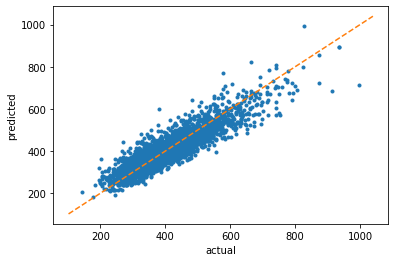

In [338]:
plt.plot(train_results.TOTAL_VALUE, train_results.predicted, '.')
plt.xlabel('actual')
plt.ylabel('predicted')
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [339]:
#Predict Validation data
valid_pred = model.predict(valid_X)
valid_results = pd.DataFrame({
    'TOTAL_VALUE': valid_y,
    'predicted': valid_pred,
    'residual': valid_y - valid_pred
})
print(valid_results.head())

      TOTAL_VALUE   predicted   residual
1822        462.0  406.946377  55.053623
1998        370.4  362.888928   7.511072
5126        407.4  390.287208  17.112792
808         316.1  382.470203 -66.370203
4034        393.2  434.334998 -41.134998


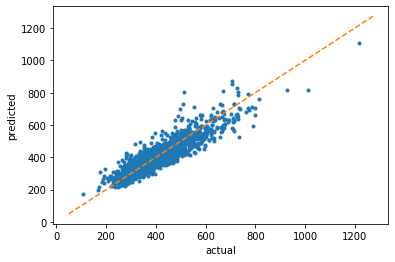

In [341]:
plt.plot(valid_results.TOTAL_VALUE, valid_results.predicted, '.')
plt.xlabel('actual')
plt.ylabel('predicted')
axes = plt.gca()
plt.plot(axes.get_xlim(), axes.get_xlim(), '--')
plt.show()

In [342]:
#sklearn
print('Training set r2: ', r2_score(train_results.TOTAL_VALUE, train_results.predicted))
print('Validation set r2: ', r2_score(valid_results.TOTAL_VALUE, valid_results.predicted))

Training set r2:  0.8097361461091853
Validation set r2:  0.8171327286147877


In [344]:
from dmba import regressionSummary

In [345]:
#training set
regressionSummary(train_results.TOTAL_VALUE, train_results.predicted)


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 43.0306
            Mean Absolute Error (MAE) : 32.6042
          Mean Percentage Error (MPE) : -1.1116
Mean Absolute Percentage Error (MAPE) : 8.4886


In [346]:
#validation set
regressionSummary(valid_results.TOTAL_VALUE, valid_results.predicted)


Regression statistics

                      Mean Error (ME) : -0.1463
       Root Mean Squared Error (RMSE) : 42.7292
            Mean Absolute Error (MAE) : 31.9663
          Mean Percentage Error (MPE) : -1.0884
Mean Absolute Percentage Error (MAPE) : 8.3283


In [347]:
new_data = pd.DataFrame({
    'LOT_SOFT': [4200, 6444, 5035],
    'YR_BUILT': [1960, 1940, 1925],
    'GROSS_AREA': [2670, 2886, 3264],
    'LIVING_AREA': [1710, 1474, 1523],
    'FLOORS': [2.0, 1.5, 1.9],
    'ROOMS': [10, 6, 6],
    'BEDROOMS': [4, 3, 2],
    'FULL_BATH': [1, 1, 1],
    'HALF_BATH': [1, 1, 0],
    'KITCHEN': [1, 1, 1],
    'FIREPLACE': [1, 1, 0],
    'REMODEL_Old': [0, 0, 0],
    'REMODEL_Recent': [0, 0, 1],
})
print(new_data)

print('Predictions: ', model.predict(new_data))

   LOT_SOFT  YR_BUILT  GROSS_AREA  LIVING_AREA  FLOORS  ROOMS  BEDROOMS  \
0      4200      1960        2670         1710     2.0     10         4   
1      6444      1940        2886         1474     1.5      6         3   
2      5035      1925        3264         1523     1.9      6         2   

   FULL_BATH  HALF_BATH  KITCHEN  FIREPLACE  REMODEL_Old  REMODEL_Recent  
0          1          1        1          1            0               0  
1          1          1        1          1            0               0  
2          1          0        1          0            0               1  
Predictions:  [384.47210285 378.06696706 386.01773842]
